## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
%matplotlib inline

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [8]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [9]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [11]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [17]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 11s 180us/step - loss: 1.2521 - acc: 0.7184 - val_loss: 0.8053 - val_acc: 0.8373
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.7087 - acc: 0.8454 - val_loss: 0.6042 - val_acc: 0.8646
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5826 - acc: 0.8623 - val_loss: 0.5239 - val_acc: 0.8745
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5221 - acc: 0.8703 - val_loss: 0.4789 - val_acc: 0.8816
Epoch 5/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4852 - acc: 0.8758 - val_loss: 0.4489 - val_acc: 0.8864
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4598 - acc: 0.8803 - val_loss: 0.4281 - val_acc: 0.8897
Epoch 7/20
60000/60000

Test score: 0.335641682690382
Test accuracy: 0.9094


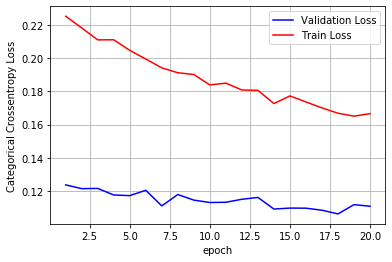

In [74]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

 <h3>  MLP + ReLu activation + Adam Optimizer </h3>

In [31]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(226, activation='relu', input_shape=(input_dim,)))
model_sigmoid.add(Dense(132, activation='relu'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 226)               177410    
_________________________________________________________________
dense_14 (Dense)             (None, 132)               29964     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1330      
Total params: 208,704
Trainable params: 208,704
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.2741 - acc: 0.9215 - val_loss: 0.1390 - val_acc: 0.9581
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.1078 - acc: 0.9671 - val_loss: 0.0909 - val_acc: 0.9705
Epoch 3/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.0704 - acc: 0.9785 - val_loss: 0.0787 - val_acc: 0.9748
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0525 - acc: 0.9838 - val_loss: 0.0837 - val_acc: 0.9734
Epoch 5/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0777 - val_acc: 0.9750
Epoch 6/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0303 - acc: 0.9904 - val_loss: 0.0749 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0231 - acc: 0.9925 - val_loss: 0.0738 - val_acc

Test score: 0.09268326033384333
Test accuracy: 0.9798


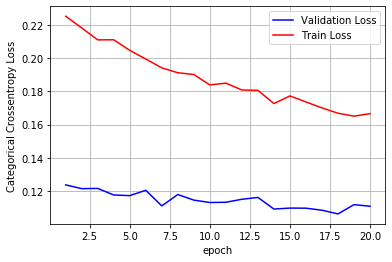

In [73]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

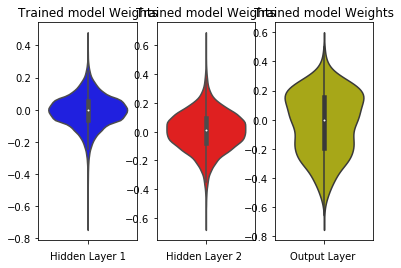

In [72]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 2 layers</h2>

In [35]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
model_drop = Sequential()

model_drop.add(Dense(226, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(132, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 226)               177410    
_________________________________________________________________
batch_normalization_3 (Batch (None, 226)               904       
_________________________________________________________________
dropout_3 (Dropout)          (None, 226)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 132)               29964     
_________________________________________________________________
batch_normalization_4 (Batch (None, 132)               528       
_________________________________________________________________
dropout_4 (Dropout)          (None, 132)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [71]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.2252 - acc: 0.9416 - val_loss: 0.1237 - val_acc: 0.9679
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.2182 - acc: 0.9431 - val_loss: 0.1214 - val_acc: 0.9685
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2109 - acc: 0.9455 - val_loss: 0.1215 - val_acc: 0.9693
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2110 - acc: 0.9453 - val_loss: 0.1176 - val_acc: 0.9697
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2046 - acc: 0.9467 - val_loss: 0.1172 - val_acc: 0.9698
Epoch 6/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.1994 - acc: 0.9486 - val_loss: 0.1204 - val_acc: 0.9688
Epoch 7/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1941 - acc: 0.9502 - val_loss: 0.1110 - val_ac

Test score: 0.12922746661901474
Test accuracy: 0.9667


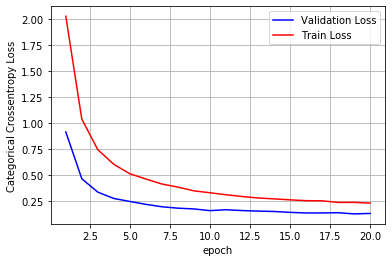

In [70]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

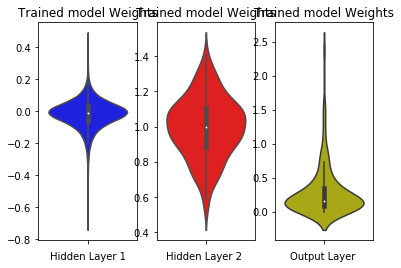

In [69]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 3 layers </h3>


In [44]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(442, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(123, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(82, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 442)               346970    
_________________________________________________________________
batch_normalization_8 (Batch (None, 442)               1768      
_________________________________________________________________
dropout_8 (Dropout)          (None, 442)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 123)               54489     
_________________________________________________________________
batch_normalization_9 (Batch (None, 123)               492       
_________________________________________________________________
dropout_9 (Dropout)          (None, 123)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 82)              

In [45]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.8982 - acc: 0.7228 - val_loss: 0.2302 - val_acc: 0.9300
Epoch 2/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.4125 - acc: 0.8783 - val_loss: 0.1740 - val_acc: 0.9462
Epoch 3/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.3221 - acc: 0.9079 - val_loss: 0.1503 - val_acc: 0.9537
Epoch 4/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2656 - acc: 0.9241 - val_loss: 0.1218 - val_acc: 0.9630
Epoch 5/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2327 - acc: 0.9330 - val_loss: 0.1177 - val_acc: 0.9652
Epoch 6/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.2128 - acc: 0.9402 - val_loss: 0.1090 - val_acc: 0.9683
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1942 - acc: 0.9448 - val_loss: 0.1001 - val_acc

Test score: 0.12922746661901474
Test accuracy: 0.9667


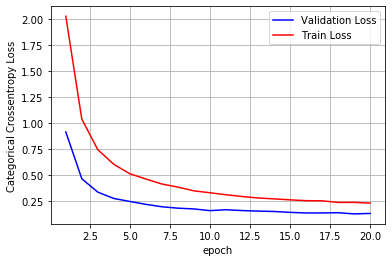

In [66]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

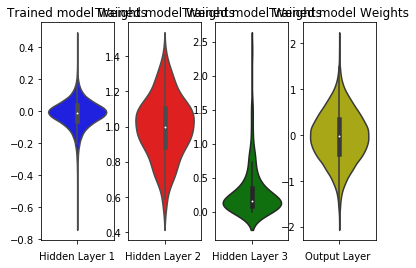

In [65]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 5 layers </h3>


In [48]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)             

In [49]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 2.0302 - acc: 0.3242 - val_loss: 0.9151 - val_acc: 0.7327
Epoch 2/20
60000/60000 [==============================] - 6s 94us/step - loss: 1.0387 - acc: 0.6370 - val_loss: 0.4634 - val_acc: 0.8767
Epoch 3/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.7431 - acc: 0.7597 - val_loss: 0.3343 - val_acc: 0.9076
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.6024 - acc: 0.8151 - val_loss: 0.2734 - val_acc: 0.9238
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.5116 - acc: 0.8481 - val_loss: 0.2446 - val_acc: 0.9332
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.4611 - acc: 0.8689 - val_loss: 0.2169 - val_acc: 0.9399
Epoch 7/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.4127 - acc: 0.8841 - val_loss: 0.1936 - val_ac

Test score: 0.12922746661901474
Test accuracy: 0.9667


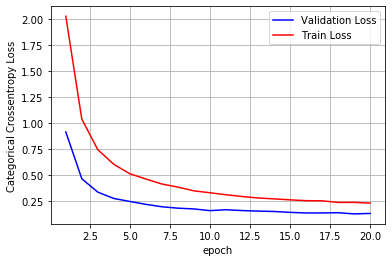

In [64]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

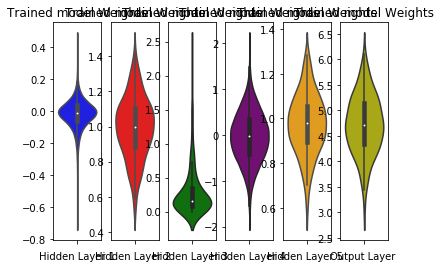

In [63]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='purple')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='orange')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3> Summary

In [0]:
from prettytable import PrettyTable
summary = PrettyTable()

In [0]:
summary.field_names = ["Model","Dropout","Test Loss","Test Accuracy"]

In [77]:
summary.add_row(["MLP + ReLu activation + Adam Optimizer","0.5", "0.092", "0.9798"])
summary.add_row(["MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 2 layers","0.5", "0.122", "0.9667"])
summary.add_row(["MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 3 layers", "0.5", "0.122", "0.9667"])
summary.add_row(["MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 5 layers", "0.5", "0.129", "0.9667"])

print(summary)


+---------------------------------------------------------------------------+---------+-----------+---------------+
|                                   Model                                   | Dropout | Test Loss | Test Accuracy |
+---------------------------------------------------------------------------+---------+-----------+---------------+
|                   MLP + ReLu activation + Adam Optimizer                  |   0.5   |   0.092   |     0.9798    |
| MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 2 layers |   0.5   |   0.122   |     0.9667    |
| MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 3 layers |   0.5   |   0.122   |     0.9667    |
| MLP + ReLu activation + BatchNormalisation + Dropout + ADAM with 5 layers |   0.5   |   0.129   |     0.9667    |
+---------------------------------------------------------------------------+---------+-----------+---------------+
